In [1]:
import graphviz

This example uses GraphViz, one of the most fun open source packages. I like GraphViz because it can do simple graph visualizations and help us to model the curriculum in a more organic way.

Initial ideas for curriculum...

- red = core-only or should be core only
- purple = course we should consider reinstating
- yellow - possible candidate for renewal or retirement

Some open questions:
- What Math is really needed for what courses?


In [2]:
def set_general_cluster_properties(c):
    c.attr(style='filled')
    c.attr(color='lightgrey')
    c.node_attr.update(style='filled', color='white')


In [3]:
clusters = {
    "core" : {
        '111' : None,
        '122' : None,
        '125' : None,
    },
    
    "foundation-y1" : {
        '150' : None,
        '170' : ['150'],
        '163' : None,
    },
    
    "math-TBD" : {
        "M161" : None, 
        "M162" : ["M161"],
        "M263" : None,
        "M264" : None,
        "M212" : None,
        "S203" : None
    },
    
    "cs-required-y2" : {
        "250" : None,
        "271" : ["170"],
        "272" : ["271"],
        "264" : ["163", "170"]    
    },
 

    "cs-y3" : {
        '313' : ['272'],
        '317' : None
    },
    
    "cs-systems-arch-ce" : {
        '339' : ['310'],
        '364' : ['310'],
        '337' : ['310', '313'],
        '362' : ['264']
    },
    
    "cs-pl-se" : {
        '335' : ['330', '371'],
        '382' : ['310', '371'],
        '376' : ['372']
    },
    
    "cs-theory" : {
        '363' : ['163', '272', 'M162'],
        'adv alg (new)' : ['363'],
        '356' : ['363']

    }
    
}

In [4]:
def add_cluster(subgraph, cluster_name, prerequisites):
    for course_number in prerequisites.keys():
        prereq_list = prerequisites[course_number]
        if prereq_list != None:
            for course_prereq in prereq_list: 
                subgraph.edge(course_prereq, course_number)
        else:
            subgraph.node(course_number)
        subgraph.attr(label=cluster_name)

def add_clusters(graph, clusters):
    for cluster_name in clusters.keys():
        with graph.subgraph(name="cluster_{}".format(cluster_name)) as cluster:
            set_general_cluster_properties(cluster)
            add_cluster(cluster, cluster_name, clusters[cluster_name])

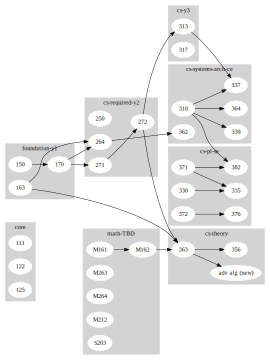

In [5]:
from graphviz import Digraph



def get_cs():
    curriculum = Digraph('G', filename='curriculum.gv')
    curriculum.attr(compound='true')
    curriculum.body.extend(['rankdir=LR', 'size="8,5"'])


    add_clusters(curriculum, clusters)
    return curriculum

cs = get_cs()
cs.save()
cs.render()


cs